In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

# experiment: dataset size vs accuracy

In [3]:
results = pd.read_csv("../results/dataset_size_vs_accuracy.csv")

In [4]:
results.shape

(10, 11)

In [12]:
results

,N,K_train_classes,train_accuracy,val_accuracy,test_accuracy,train_f1_weighted,val_f1_weighted,test_f1_weighted,model__C,vectorizer__max_features,vectorizer__ngram_range
0,1000,21,0.728994,0.496008,0.419097,0.720546,0.467747,0.358386,1,500,"(1, 2)"
1,2000,21,0.689499,0.562503,0.443967,0.667604,0.519426,0.381202,1,500,"(1, 2)"
2,3000,21,0.699833,0.597333,0.465152,0.681127,0.555653,0.410857,1,500,"(1, 2)"
3,4000,21,0.722375,0.620003,0.492478,0.706070,0.586859,0.442781,1,500,"(1, 1)"
4,5000,22,0.746200,0.623600,0.515198,0.735739,0.597621,0.468846,1,1000,"(1, 1)"
5,6000,22,0.750917,0.618500,0.536383,0.741483,0.596141,0.498796,1,1000,"(1, 1)"
6,7000,22,0.760357,0.630573,0.570157,0.750708,0.612261,0.541776,1,1000,"(1, 1)"
7,8000,22,0.760500,0.636121,0.583973,0.751445,0.619201,0.560644,1,1000,"(1, 1)"
8,9000,22,0.787611,0.645000,0.599018,0.780274,0.629342,0.576513,1,2000,"(1, 1)"
9,10000,22,0.790850,0.653902,0.604544,0.784066,0.638800,0.583112,1,2000,"(1, 1)"


## Analyse data set size vs accuracy

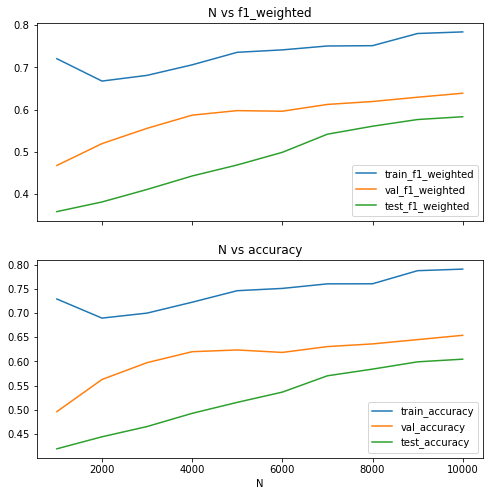

In [21]:
def plot_metric(results: pd.DataFrame, metric_name: str, ax=None):
    prefixes = ["train", "val", "test"]
    columns = [f"{prefix}_{metric_name}" for prefix in prefixes]
    results.set_index("N")[columns].plot(title=f"N vs {metric_name}", ax=ax)

fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
plot_metric(results, "f1_weighted", axes[0])
plot_metric(results, "accuracy", axes[1])

* metrics grow almost linearly with N increasing
* there is significant overfitting

Text(0, 0.5, 'test_accuracy')

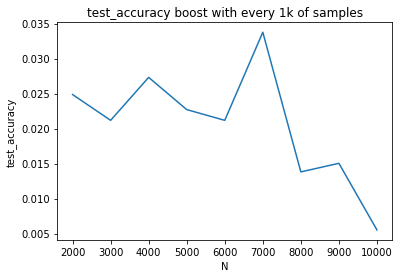

In [38]:
results.set_index("N")["test_accuracy"].diff(1).plot(title="test_accuracy boost with every 1k of samples")
plt.ylabel("test_accuracy")

Impact of a bigger data set is deminishing after 8k samples

In [31]:
average_boost = results.set_index("N")["test_accuracy"].diff(1).mean()
print(f"On average, every 1k samples adds {int(average_boost * 100)}% of accuracy")

On average, every 1k samples adds 2% of accuracy


## Analyse number of features vs number of rows

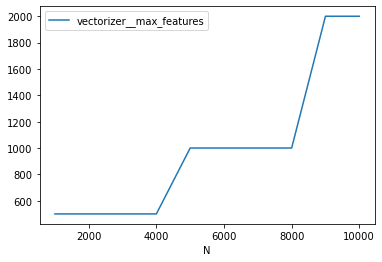

In [7]:
results.plot("N", "vectorizer__max_features")

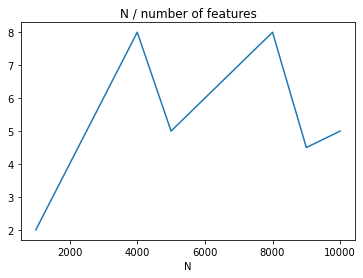

In [11]:
foo = (results["N"] / results["vectorizer__max_features"])
foo.index = results["N"]
foo.plot(title="N / number of features")

In [33]:
n_features_per_record = (results["N"] / results["vectorizer__max_features"]).mean()
print(f"seems that {round(n_features_per_record)} is the optimal ratio for `number of rows / number of features`")

seems that 6 is the optimal ratio for `number of rows / number of features`


# generic experiment

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
RESULTS_PATH = "../results/results.csv"

In [3]:
results = pd.read_csv(RESULTS_PATH)

In [4]:
results.head()

,Unnamed: 0,N,M,params,score
0,0,500,50,"{'model': LogisticRegression(), 'svd': Truncat...",0.160577
1,1,500,50,"{'model': LogisticRegression(), 'svd': Truncat...",0.159963
2,2,500,50,"{'model': LogisticRegression(), 'svd': Truncat...",0.166104
3,3,500,100,"{'model': LogisticRegression(), 'svd': Truncat...",0.193430
4,4,500,100,"{'model': LogisticRegression(), 'svd': Truncat...",0.190973


In [5]:
results.sort_values("score", ascending=False, inplace=True)

In [6]:
results.head()

,Unnamed: 0,N,M,params,score
82,82,10000,300,"{'model': LogisticRegression(), 'svd': Truncat...",0.545901
83,83,10000,300,"{'model': LogisticRegression(), 'svd': Truncat...",0.544980
81,81,10000,300,"{'model': LogisticRegression(), 'svd': Truncat...",0.537304
80,80,10000,200,"{'model': LogisticRegression(), 'svd': Truncat...",0.529014
79,79,10000,200,"{'model': LogisticRegression(), 'svd': Truncat...",0.525944


Text(0.5, 1.0, 'N/M vs score')

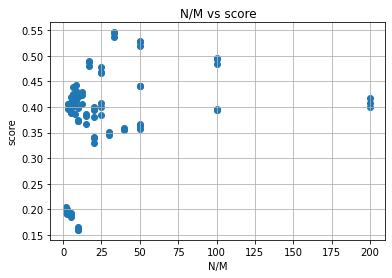

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(results['N'] / results['M'], results['score'])
plt.xlabel("N/M")
plt.ylabel("score")
plt.grid()
plt.title("N/M vs score")

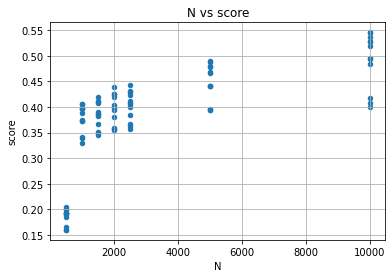

In [17]:
results.plot.scatter(x='N', y='score', title='N vs score')
plt.grid()

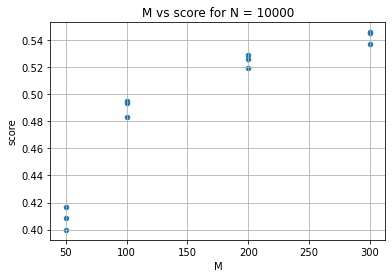

In [22]:
results.query("N==10000").plot.scatter(x='M', y='score', title='M vs score for N = 10000')
plt.grid()